<a href="https://colab.research.google.com/github/NytKing/happiness-index/blob/main/Happiness_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving world-happiness-report-2021.csv to world-happiness-report-2021.csv


In [ ]:
import pandas as pd
import numpy as np
import io
hapi= pd.read_csv(io.BytesIO(uploaded['world-happiness-report-2021.csv']))
hapi.columns = (hapi.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
col=hapi.columns
col

Index(['COUNTRY_NAME', 'REGIONAL_INDICATOR', 'LADDER_SCORE',
       'STANDARD_ERROR_OF_LADDER_SCORE', 'UPPERWHISKER', 'LOWERWHISKER',
       'LOGGED_GDP_PER_CAPITA', 'SOCIAL_SUPPORT', 'HEALTHY_LIFE_EXPECTANCY',
       'FREEDOM_TO_MAKE_LIFE_CHOICES', 'GENEROSITY',
       'PERCEPTIONS_OF_CORRUPTION', 'LADDER_SCORE_IN_DYSTOPIA',
       'EXPLAINED_BY:_LOG_GDP_PER_CAPITA', 'EXPLAINED_BY:_SOCIAL_SUPPORT',
       'EXPLAINED_BY:_HEALTHY_LIFE_EXPECTANCY',
       'EXPLAINED_BY:_FREEDOM_TO_MAKE_LIFE_CHOICES',
       'EXPLAINED_BY:_GENEROSITY', 'EXPLAINED_BY:_PERCEPTIONS_OF_CORRUPTION',
       'DYSTOPIA_+_RESIDUAL'],
      dtype='object')

In [ ]:
hapi=hapi[[col[0],col[1],col[2],col[6],col[7],col[8],col[9],col[10],col[11]]]
hapi

,COUNTRY_NAME,REGIONAL_INDICATOR,LADDER_SCORE,LOGGED_GDP_PER_CAPITA,SOCIAL_SUPPORT,HEALTHY_LIFE_EXPECTANCY,FREEDOM_TO_MAKE_LIFE_CHOICES,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [ ]:
hapi[col[1]].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [ ]:
hapi=hapi.loc[hapi['REGIONAL_INDICATOR'].isin(['East Asia','Southeast Asia','South Asia'])]
hapi

,COUNTRY_NAME,REGIONAL_INDICATOR,LADDER_SCORE,LOGGED_GDP_PER_CAPITA,SOCIAL_SUPPORT,HEALTHY_LIFE_EXPECTANCY,FREEDOM_TO_MAKE_LIFE_CHOICES,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
23,Taiwan Province of China,East Asia,6.584,10.871,0.898,69.600,0.784,-0.070,0.721
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082
53,Thailand,Southeast Asia,5.985,9.805,0.888,67.401,0.884,0.287,0.895
55,Japan,East Asia,5.940,10.611,0.884,75.100,0.796,-0.258,0.638
60,Philippines,Southeast Asia,5.880,9.076,0.830,62.000,0.917,-0.097,0.742
61,South Korea,East Asia,5.845,10.651,0.799,73.900,0.672,-0.083,0.727
69,Mongolia,East Asia,5.677,9.400,0.935,62.500,0.708,0.116,0.856
76,Hong Kong S.A.R. of China,East Asia,5.477,11.000,0.836,76.820,0.717,0.067,0.403
78,Vietnam,Southeast Asia,5.411,8.973,0.850,68.034,0.940,-0.098,0.796
80,Malaysia,Southeast Asia,5.384,10.238,0.817,67.102,0.895,0.125,0.839


In [ ]:
! pip install geopandas

     |████████████████████████████████| 1.0MB 3.9MB/s 
     |████████████████████████████████| 6.6MB 25.6MB/s 
     |████████████████████████████████| 15.4MB 175kB/s 


In [ ]:
import geopandas as gpd
wmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
both=pd.merge(wmap,hapi,left_on="name",right_on='COUNTRY_NAME')
both=both.drop(['name'],axis=1)
both

,pop_est,continent,iso_a3,gdp_md_est,geometry,COUNTRY_NAME,REGIONAL_INDICATOR,LADDER_SCORE,LOGGED_GDP_PER_CAPITA,SOCIAL_SUPPORT,HEALTHY_LIFE_EXPECTANCY,FREEDOM_TO_MAKE_LIFE_CHOICES,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
0,260580739,Asia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,Southeast Asia,5.345,9.365,0.811,62.236,0.873,0.542,0.867
1,16204486,Asia,KHM,58940.0,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",Cambodia,Southeast Asia,4.830,8.360,0.765,62.000,0.959,0.034,0.843
2,68414135,Asia,THA,1161000.0,"POLYGON ((105.21878 14.27321, 104.28142 14.416...",Thailand,Southeast Asia,5.985,9.805,0.888,67.401,0.884,0.287,0.895
3,7126706,Asia,LAO,40960.0,"POLYGON ((107.38273 14.20244, 106.49637 14.570...",Laos,Southeast Asia,5.030,8.947,0.728,58.968,0.910,0.123,0.658
4,55123814,Asia,MMR,311100.0,"POLYGON ((100.11599 20.41785, 99.54331 20.1866...",Myanmar,Southeast Asia,4.426,8.541,0.779,59.302,0.876,0.509,0.660
5,96160163,Asia,VNM,594900.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",Vietnam,Southeast Asia,5.411,8.973,0.850,68.034,0.940,-0.098,0.796
6,51181299,Asia,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",South Korea,East Asia,5.845,10.651,0.799,73.900,0.672,-0.083,0.727
7,3068243,Asia,MNG,37000.0,"POLYGON ((87.75126 49.29720, 88.80557 49.47052...",Mongolia,East Asia,5.677,9.400,0.935,62.500,0.708,0.116,0.856
8,1281935911,Asia,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774
9,157826578,Asia,BGD,628400.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",Bangladesh,South Asia,5.025,8.454,0.693,64.800,0.877,-0.041,0.682


([], <a list of 0 Text major ticklabel objects>)

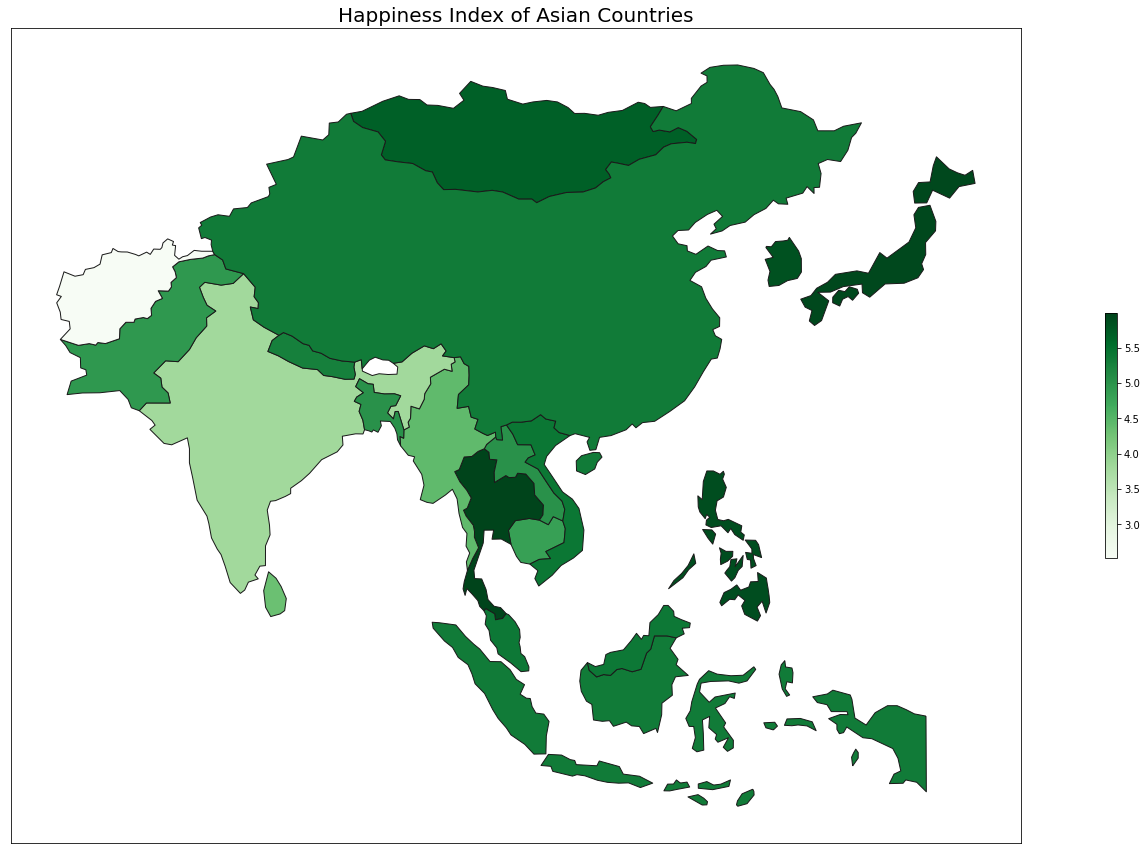

In [ ]:
import matplotlib.pyplot as plt
both.plot("LADDER_SCORE","Greens",figsize=(30,15),legend=True,edgecolors="0.1",legend_kwds={"shrink":0.3})
plt.title('Happiness Index of Asian Countries',fontdict={'fontsize':20})
plt.xticks([])
plt.yticks([])

In [ ]:
from numpy import *
y=[]
hapi_sea=hapi.loc[hapi['REGIONAL_INDICATOR'].isin(['Southeast Asia'])]
y.append(round(hapi_sea['LADDER_SCORE'].mean(),2))
hapi_sa=hapi.loc[hapi['REGIONAL_INDICATOR'].isin(['South Asia'])]
y.append(        round(hapi_sa["LADDER_SCORE"].mean(),2)         )
hapi_ea=hapi.loc[hapi['REGIONAL_INDICATOR'].isin(['East Asia'])]
y.append(         round(hapi_ea["LADDER_SCORE"].mean(),2)    )
y

region=[]
hapi_sea=hapi.loc[hapi['REGIONAL_INDICATOR'].isin(['Southeast Asia'])]
region.append(hapi_sea['REGIONAL_INDICATOR'].unique())
hapi_sa=hapi.loc[hapi['REGIONAL_INDICATOR'].isin(['South Asia'])]
region.append(hapi_sa['REGIONAL_INDICATOR'].unique())
hapi_ea=hapi.loc[hapi['REGIONAL_INDICATOR'].isin(['East Asia'])]
region.append(hapi_ea['REGIONAL_INDICATOR'].unique())

region = [list(x) for x in region]
region

new_region=[]
for i in region:
  new_region.extend(i)
new_region

print('y=',y,'\nregion=',new_region)

y= [5.41, 4.44, 5.81] 
region= ['Southeast Asia', 'South Asia', 'East Asia']


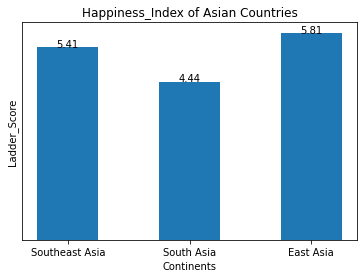

In [ ]:
import matplotlib.pyplot as plt
plt.bar(new_region,y,width=0.5)
for continent, ladder in enumerate(y):
    plt.text(continent, ladder, str(ladder),horizontalalignment='center')
plt.xlabel('Continents')
plt.ylabel('Ladder_Score')
plt.title('Happiness_Index of Asian Countries')
plt.yticks([])
plt.show()

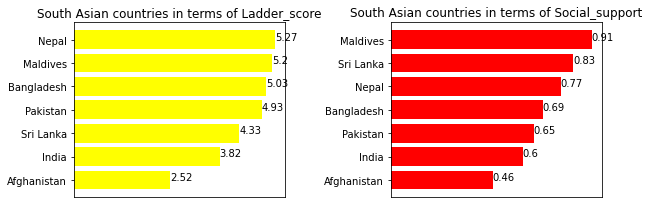

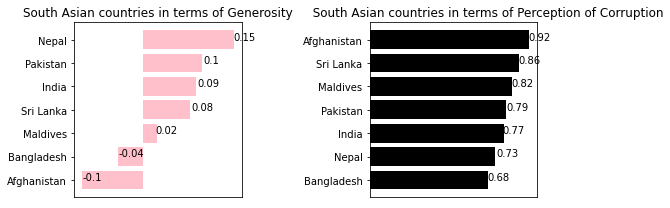

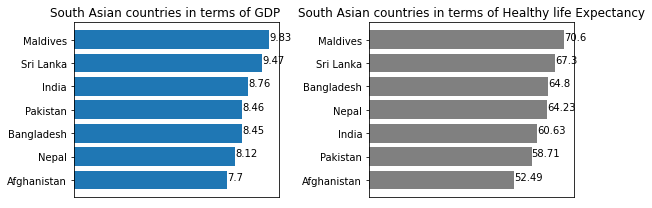

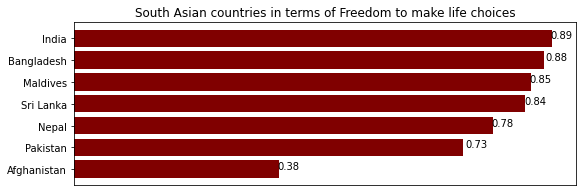

In [ ]:
############################ SOUTH ASIAN COUNTRIES ##################################

#################### LADDER and SOCIAL_SUPPORT#################################
x=[]
for i in hapi_sa['LADDER_SCORE']:
  x.append(round(i,2))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(9,3))

ax1.barh(hapi_sa['COUNTRY_NAME'],hapi_sa['LADDER_SCORE'],color="yellow")
for continent, ladder in enumerate(x):
    ax1.text(ladder, continent, str(ladder))
ax1.invert_yaxis()
ax1.set_title('South Asian countries in terms of Ladder_score')
ax1.axes.get_xaxis().set_visible(False)


hapi_sa_social=hapi_sa.sort_values(by='SOCIAL_SUPPORT')
social=[]
for i in hapi_sa_social["SOCIAL_SUPPORT"]:
  social.append(round(i,2))

ax2.barh(hapi_sa_social['COUNTRY_NAME'],hapi_sa_social["SOCIAL_SUPPORT"],color="red")
for continent, ladder in enumerate(social):
    ax2.text(ladder, continent, str(ladder))

ax2.set_title('South Asian countries in terms of Social_support')
ax2.axes.get_xaxis().set_visible(False)

fig.tight_layout()
plt.show()
###########################################################################

######################################### GENEROSITY and CORRUPTION ################################


grp,(ax3,ax4)=plt.subplots(1,2,figsize=(9,3))

hapi_sa_gen=hapi_sa.sort_values(by='GENEROSITY')
gen=[]
for i in hapi_sa_gen["GENEROSITY"]:
  gen.append(round(i,2))

ax3.barh(hapi_sa_gen['COUNTRY_NAME'],hapi_sa_gen["GENEROSITY"],color="pink")
for continent, ladder in enumerate(gen):
    ax3.text(ladder, continent, str(ladder))

ax3.set_title('South Asian countries in terms of Generosity')
ax3.axes.get_xaxis().set_visible(False)

hapi_sa_cor=hapi_sa.sort_values(by='PERCEPTIONS_OF_CORRUPTION')
cor=[]
for i in hapi_sa_cor["PERCEPTIONS_OF_CORRUPTION"]:
  cor.append(round(i,2))

ax4.barh(hapi_sa_cor['COUNTRY_NAME'],hapi_sa_cor["PERCEPTIONS_OF_CORRUPTION"],color="black")
for continent, ladder in enumerate(cor):
    ax4.text(ladder, continent, str(ladder))

ax4.set_title('                  South Asian countries in terms of Perception of Corruption')
ax4.axes.get_xaxis().set_visible(False)

grp.tight_layout()
plt.show()

#####################################################################################
###################################### GDP PER CAPITA and LIFE EXPEXTANCY #########################

f,(ax5,ax6)=plt.subplots(1,2,figsize=(9,3))

hapi_sa_gdp=hapi_sa.sort_values(by='LOGGED_GDP_PER_CAPITA')
gdp=[]
for i in hapi_sa_gdp["LOGGED_GDP_PER_CAPITA"]:
  gdp.append(round(i,2))

ax5.barh(hapi_sa_gdp['COUNTRY_NAME'],hapi_sa_gdp["LOGGED_GDP_PER_CAPITA"])
for continent, ladder in enumerate(gdp):
    ax5.text(ladder, continent, str(ladder))

ax5.set_title('South Asian countries in terms of GDP      ')
ax5.axes.get_xaxis().set_visible(False)

hapi_sa_lif=hapi_sa.sort_values(by='HEALTHY_LIFE_EXPECTANCY')
lif=[]
for i in hapi_sa_lif["HEALTHY_LIFE_EXPECTANCY"]:
  lif.append(round(i,2))

ax6.barh(hapi_sa_lif['COUNTRY_NAME'],hapi_sa_lif["HEALTHY_LIFE_EXPECTANCY"],color="grey")
for continent, ladder in enumerate(lif):
    ax6.text(ladder, continent, str(ladder))

ax6.set_title('South Asian countries in terms of Healthy life Expectancy')
ax6.axes.get_xaxis().set_visible(False)

f.tight_layout()
plt.show()

##########################################################################
############################################## FREEDOM_TO_MAKE_LIFE_CHOICES ###################################

g,ax7=plt.subplots(figsize=(9,3))

hapi_sa_fre=hapi_sa.sort_values(by='FREEDOM_TO_MAKE_LIFE_CHOICES')
fre=[]
for i in hapi_sa_fre["FREEDOM_TO_MAKE_LIFE_CHOICES"]:
  fre.append(round(i,2))

ax7.barh(hapi_sa_fre['COUNTRY_NAME'],hapi_sa_fre["FREEDOM_TO_MAKE_LIFE_CHOICES"],color="maroon")
for continent, ladder in enumerate(fre):
    ax7.text(ladder, continent, str(ladder))

ax7.set_title('South Asian countries in terms of Freedom to make life choices')
ax7.axes.get_xaxis().set_visible(False)

#g.tight_layout()
plt.show()
####################################################################################

In [ ]:
hapi_sa

,COUNTRY_NAME,REGIONAL_INDICATOR,LADDER_SCORE,LOGGED_GDP_PER_CAPITA,SOCIAL_SUPPORT,HEALTHY_LIFE_EXPECTANCY,FREEDOM_TO_MAKE_LIFE_CHOICES,GENEROSITY,PERCEPTIONS_OF_CORRUPTION
86,Nepal,South Asia,5.269,8.120,0.774,64.233,0.782,0.152,0.727
88,Maldives,South Asia,5.198,9.826,0.913,70.600,0.854,0.024,0.825
100,Bangladesh,South Asia,5.025,8.454,0.693,64.800,0.877,-0.041,0.682
104,Pakistan,South Asia,4.934,8.458,0.651,58.709,0.726,0.098,0.787
128,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863
138,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [ ]:
independent=hapi_sa.drop(['LADDER_SCORE',"COUNTRY_NAME","REGIONAL_INDICATOR"],axis=1).values
target=hapi_sa['LADDER_SCORE']
print(target)
print(independent)

86     5.269
88     5.198
100    5.025
104    4.934
128    4.325
138    3.819
148    2.523
Name: LADDER_SCORE, dtype: float64
[[ 8.1200e+00  7.7400e-01  6.4233e+01  7.8200e-01  1.5200e-01  7.2700e-01]
 [ 9.8260e+00  9.1300e-01  7.0600e+01  8.5400e-01  2.4000e-02  8.2500e-01]
 [ 8.4540e+00  6.9300e-01  6.4800e+01  8.7700e-01 -4.1000e-02  6.8200e-01]
 [ 8.4580e+00  6.5100e-01  5.8709e+01  7.2600e-01  9.8000e-02  7.8700e-01]
 [ 9.4700e+00  8.2700e-01  6.7299e+01  8.4100e-01  7.9000e-02  8.6300e-01]
 [ 8.7550e+00  6.0300e-01  6.0633e+01  8.9300e-01  8.9000e-02  7.7400e-01]
 [ 7.6950e+00  4.6300e-01  5.2493e+01  3.8200e-01 -1.0200e-01  9.2400e-01]]


Text(0.5, 1.0, 'Important Factors')

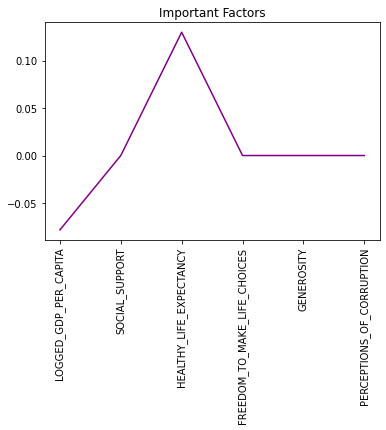

In [ ]:
from sklearn.linear_model import Lasso

colu=hapi_sa.drop(['LADDER_SCORE',"COUNTRY_NAME","REGIONAL_INDICATOR"],axis=1).columns

lasso=Lasso(alpha=0.1)
lasso_c=lasso.fit(independent,target).coef_

#g,ax=plt.subplots(figsize=(10,5))
plt.plot(range(len(colu)),lasso_c,color="purple")
plt.xticks(range(len(colu)),colu,rotation=90)   
#ax.axes.get_xaxis().set_visible(range(len(colu)),colu)
plt.title("Important Factors")